### IMPORT THE LIBRARIES 

In [3]:
from PIL import Image, ImageFilter
from skimage.feature import greycomatrix
import numpy as np
from matplotlib import pyplot as plt
import cv2 as c

### OPEN THE IMAGE 

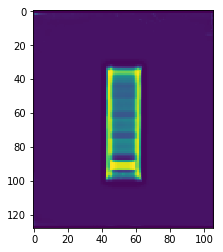

In [4]:
image = Image.open("X-Rays/84_60.bmp")
plt.imshow(image)

### FIND THE WIDTH AND HEIGHT OF THE IMAGE

In [5]:
width, height = image.size
print(width,height)

106 128


### CROP THE REGION OF INTEREST FROM THE IMAGE

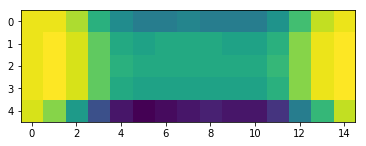

In [6]:
left = 45
top = 88.8
right = 60
bottom = 94
cropped_img = image.crop((left,top,right,bottom))
plt.imshow(cropped_img)

### UNIQUE VALUES FROM AN ARRAY

In [7]:
np.unique(cropped_img)

array([199, 200, 201, 202, 204, 207, 213, 214, 215, 216, 217, 218, 219,
       220, 221, 222, 224, 226, 228, 229, 230, 231, 232], dtype=uint8)

### AVERAGE PIXEL INTENSITY

In [8]:
avg_pixel_intensity = np.mean(cropped_img)
print(avg_pixel_intensity)

220.32
